In [1]:
from src import *
import torch
from torch import nn
import numpy
import numpy as np
from matplotlib import pyplot as plt
from torch.distributions.exponential import Exponential

NOTE: Redirects are currently not supported in Windows or MacOs.


In [2]:
device="cpu"
model = Unet(
    dim = 32,
    channels = 3,
    dim_mults = (1, 2, 4, 8),
    bits = BITS
).to(device)

diffusion = BitDiffusion(model, image_size = 32).to(device)

diffusion.sample([1,24,32,32],conditioning=False)

sampling loop time step:   0%|          | 2/1000 [00:00<01:08, 14.58it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   1%|          | 6/1000 [00:00<00:55, 17.86it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   1%|          | 10/1000 [00:00<00:52, 18.71it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   1%|▏         | 14/1000 [00:00<00:51, 19.08it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   2%|▏         | 18/1000 [00:00<00:51, 18.89it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   2%|▏         | 22/1000 [00:01<00:53, 18.21it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   3%|▎         | 26/1000 [00:01<00:54, 18.02it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   3%|▎         | 30/1000 [00:01<00:52, 18.33it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   3%|▎         | 34/1000 [00:01<00:51, 18.64it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   4%|▍         | 38/1000 [00:02<00:50, 18.95it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   4%|▍         | 42/1000 [00:02<00:51, 18.69it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   5%|▍         | 46/1000 [00:02<00:51, 18.62it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   5%|▌         | 50/1000 [00:02<00:49, 19.05it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   5%|▌         | 54/1000 [00:02<00:49, 19.19it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   6%|▌         | 58/1000 [00:03<00:49, 19.09it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   6%|▌         | 62/1000 [00:03<00:49, 19.03it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   7%|▋         | 66/1000 [00:03<00:50, 18.63it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   7%|▋         | 70/1000 [00:03<00:50, 18.49it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   7%|▋         | 74/1000 [00:04<00:59, 15.56it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   8%|▊         | 78/1000 [00:04<00:56, 16.40it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   8%|▊         | 82/1000 [00:04<00:52, 17.43it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   9%|▊         | 86/1000 [00:04<00:50, 17.95it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   9%|▉         | 90/1000 [00:04<00:49, 18.24it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:   9%|▉         | 94/1000 [00:05<00:49, 18.33it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  10%|▉         | 98/1000 [00:05<00:48, 18.42it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  10%|█         | 102/1000 [00:05<00:48, 18.60it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  11%|█         | 106/1000 [00:05<00:47, 18.88it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  11%|█         | 110/1000 [00:06<00:46, 19.01it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  11%|█▏        | 114/1000 [00:06<00:46, 19.03it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  12%|█▏        | 118/1000 [00:06<00:46, 19.06it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  12%|█▏        | 122/1000 [00:06<00:45, 19.32it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  13%|█▎        | 126/1000 [00:06<00:44, 19.43it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  13%|█▎        | 130/1000 [00:07<00:45, 19.31it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  13%|█▎        | 134/1000 [00:07<00:44, 19.26it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  14%|█▍        | 138/1000 [00:07<00:45, 19.11it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  14%|█▍        | 142/1000 [00:07<00:44, 19.17it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  15%|█▍        | 146/1000 [00:07<00:44, 19.16it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  15%|█▌        | 150/1000 [00:08<00:44, 19.25it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  15%|█▌        | 154/1000 [00:08<00:43, 19.33it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  16%|█▌        | 158/1000 [00:08<00:43, 19.42it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  16%|█▌        | 162/1000 [00:08<00:43, 19.17it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  17%|█▋        | 166/1000 [00:08<00:43, 19.34it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  17%|█▋        | 170/1000 [00:09<00:42, 19.43it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  17%|█▋        | 174/1000 [00:09<00:42, 19.43it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  18%|█▊        | 178/1000 [00:09<00:42, 19.48it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  18%|█▊        | 182/1000 [00:09<00:41, 19.57it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  19%|█▊        | 186/1000 [00:09<00:41, 19.50it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  19%|█▉        | 190/1000 [00:10<00:42, 19.23it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  19%|█▉        | 194/1000 [00:10<00:42, 19.11it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  20%|█▉        | 198/1000 [00:10<00:41, 19.16it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  20%|██        | 202/1000 [00:10<00:41, 19.18it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  21%|██        | 206/1000 [00:10<00:41, 19.06it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  21%|██        | 210/1000 [00:11<00:41, 19.23it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  21%|██▏       | 214/1000 [00:11<00:40, 19.31it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  22%|██▏       | 218/1000 [00:11<00:40, 19.16it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  22%|██▏       | 222/1000 [00:11<00:40, 19.15it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  23%|██▎       | 226/1000 [00:12<00:43, 17.81it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  23%|██▎       | 230/1000 [00:12<00:41, 18.46it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  23%|██▎       | 234/1000 [00:12<00:41, 18.64it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  24%|██▍       | 238/1000 [00:12<00:40, 18.96it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  24%|██▍       | 242/1000 [00:12<00:41, 18.28it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  25%|██▍       | 246/1000 [00:13<00:40, 18.70it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  25%|██▌       | 250/1000 [00:13<00:39, 18.93it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  25%|██▌       | 254/1000 [00:13<00:39, 18.69it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  26%|██▌       | 258/1000 [00:13<00:39, 19.00it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  26%|██▌       | 262/1000 [00:13<00:39, 18.88it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  27%|██▋       | 266/1000 [00:14<00:39, 18.78it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  27%|██▋       | 270/1000 [00:14<00:38, 19.06it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  27%|██▋       | 274/1000 [00:14<00:37, 19.31it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  28%|██▊       | 278/1000 [00:14<00:37, 19.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  28%|██▊       | 282/1000 [00:15<00:37, 19.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  29%|██▊       | 286/1000 [00:15<00:36, 19.39it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  29%|██▉       | 290/1000 [00:15<00:36, 19.41it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  29%|██▉       | 294/1000 [00:15<00:36, 19.32it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  30%|██▉       | 298/1000 [00:15<00:36, 19.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  30%|███       | 302/1000 [00:16<00:35, 19.41it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  31%|███       | 306/1000 [00:16<00:35, 19.43it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  31%|███       | 310/1000 [00:16<00:35, 19.44it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  31%|███▏      | 314/1000 [00:16<00:35, 19.45it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  32%|███▏      | 318/1000 [00:16<00:35, 19.39it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  32%|███▏      | 322/1000 [00:17<00:35, 19.29it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  33%|███▎      | 326/1000 [00:17<00:34, 19.35it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  33%|███▎      | 330/1000 [00:17<00:34, 19.36it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  33%|███▎      | 334/1000 [00:17<00:34, 19.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  34%|███▍      | 338/1000 [00:17<00:34, 19.36it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  34%|███▍      | 342/1000 [00:18<00:33, 19.40it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  35%|███▍      | 346/1000 [00:18<00:33, 19.44it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  35%|███▌      | 350/1000 [00:18<00:33, 19.42it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  35%|███▌      | 354/1000 [00:18<00:33, 19.45it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  36%|███▌      | 358/1000 [00:18<00:33, 19.34it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  36%|███▌      | 362/1000 [00:19<00:32, 19.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  37%|███▋      | 366/1000 [00:19<00:32, 19.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  37%|███▋      | 370/1000 [00:19<00:32, 19.45it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  37%|███▋      | 374/1000 [00:19<00:32, 19.44it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  38%|███▊      | 378/1000 [00:19<00:32, 19.43it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  38%|███▊      | 382/1000 [00:20<00:31, 19.40it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  39%|███▊      | 386/1000 [00:20<00:31, 19.41it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  39%|███▉      | 390/1000 [00:20<00:31, 19.40it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  39%|███▉      | 394/1000 [00:20<00:31, 19.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  40%|███▉      | 398/1000 [00:20<00:30, 19.43it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  40%|████      | 402/1000 [00:21<00:30, 19.41it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  41%|████      | 406/1000 [00:21<00:30, 19.24it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  41%|████      | 410/1000 [00:21<00:33, 17.39it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  41%|████▏     | 414/1000 [00:21<00:32, 18.26it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  42%|████▏     | 418/1000 [00:22<00:30, 18.88it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  42%|████▏     | 422/1000 [00:22<00:30, 18.98it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  43%|████▎     | 426/1000 [00:22<00:30, 19.07it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  43%|████▎     | 430/1000 [00:22<00:30, 18.84it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  43%|████▎     | 434/1000 [00:22<00:30, 18.82it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  44%|████▍     | 438/1000 [00:23<00:29, 19.03it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  44%|████▍     | 442/1000 [00:23<00:29, 18.93it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  45%|████▍     | 446/1000 [00:23<00:28, 19.14it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  45%|████▌     | 450/1000 [00:23<00:28, 18.97it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  45%|████▌     | 454/1000 [00:23<00:29, 18.66it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  46%|████▌     | 458/1000 [00:24<00:28, 18.81it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  46%|████▌     | 462/1000 [00:24<00:28, 19.08it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  47%|████▋     | 466/1000 [00:24<00:27, 19.10it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  47%|████▋     | 470/1000 [00:24<00:27, 19.04it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  47%|████▋     | 474/1000 [00:25<00:27, 18.92it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  48%|████▊     | 478/1000 [00:25<00:27, 18.88it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  48%|████▊     | 482/1000 [00:25<00:27, 19.10it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  49%|████▊     | 486/1000 [00:25<00:26, 19.26it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  49%|████▉     | 490/1000 [00:25<00:26, 18.99it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  49%|████▉     | 494/1000 [00:26<00:27, 18.61it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  50%|████▉     | 498/1000 [00:26<00:27, 18.58it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  50%|█████     | 502/1000 [00:26<00:26, 19.01it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  51%|█████     | 506/1000 [00:26<00:26, 18.90it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  51%|█████     | 510/1000 [00:26<00:25, 18.93it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  51%|█████▏    | 514/1000 [00:27<00:25, 18.85it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  52%|█████▏    | 518/1000 [00:27<00:25, 19.11it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  52%|█████▏    | 522/1000 [00:27<00:24, 19.26it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  53%|█████▎    | 526/1000 [00:27<00:24, 19.36it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  53%|█████▎    | 530/1000 [00:27<00:24, 19.33it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  53%|█████▎    | 534/1000 [00:28<00:24, 19.10it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  54%|█████▍    | 538/1000 [00:28<00:24, 18.84it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  54%|█████▍    | 542/1000 [00:28<00:24, 18.73it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  55%|█████▍    | 546/1000 [00:28<00:23, 19.00it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  55%|█████▌    | 550/1000 [00:29<00:23, 18.96it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  55%|█████▌    | 554/1000 [00:29<00:26, 16.96it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  56%|█████▌    | 558/1000 [00:29<00:25, 17.63it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  56%|█████▌    | 562/1000 [00:29<00:23, 18.26it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  57%|█████▋    | 566/1000 [00:29<00:23, 18.66it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  57%|█████▋    | 570/1000 [00:30<00:22, 18.84it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  57%|█████▋    | 574/1000 [00:30<00:22, 18.97it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  58%|█████▊    | 578/1000 [00:30<00:22, 19.15it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  58%|█████▊    | 582/1000 [00:30<00:21, 19.05it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  59%|█████▊    | 586/1000 [00:30<00:21, 18.96it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  59%|█████▉    | 590/1000 [00:31<00:21, 18.88it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  59%|█████▉    | 594/1000 [00:31<00:21, 19.01it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  60%|█████▉    | 598/1000 [00:31<00:22, 17.55it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  60%|██████    | 602/1000 [00:31<00:22, 18.04it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  61%|██████    | 606/1000 [00:32<00:23, 17.11it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  61%|██████    | 610/1000 [00:32<00:21, 17.94it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  61%|██████▏   | 614/1000 [00:32<00:20, 18.46it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  62%|██████▏   | 618/1000 [00:32<00:20, 18.67it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  62%|██████▏   | 622/1000 [00:32<00:20, 18.89it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  63%|██████▎   | 626/1000 [00:33<00:19, 18.93it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  63%|██████▎   | 630/1000 [00:33<00:20, 17.77it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  63%|██████▎   | 634/1000 [00:33<00:19, 18.39it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  64%|██████▍   | 638/1000 [00:33<00:20, 17.29it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  64%|██████▍   | 642/1000 [00:34<00:19, 18.11it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  65%|██████▍   | 646/1000 [00:34<00:19, 18.02it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  65%|██████▌   | 650/1000 [00:34<00:18, 18.54it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  65%|██████▌   | 654/1000 [00:34<00:18, 18.21it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  66%|██████▌   | 658/1000 [00:34<00:18, 18.58it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  66%|██████▌   | 662/1000 [00:35<00:17, 18.78it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  67%|██████▋   | 666/1000 [00:35<00:17, 18.81it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  67%|██████▋   | 670/1000 [00:35<00:17, 18.92it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  67%|██████▋   | 674/1000 [00:35<00:17, 19.02it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  68%|██████▊   | 678/1000 [00:35<00:16, 19.08it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  68%|██████▊   | 682/1000 [00:36<00:16, 19.19it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  69%|██████▊   | 686/1000 [00:36<00:16, 19.23it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  69%|██████▉   | 690/1000 [00:36<00:16, 19.11it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  69%|██████▉   | 694/1000 [00:36<00:16, 18.48it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  70%|██████▉   | 698/1000 [00:37<00:16, 18.73it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  70%|███████   | 702/1000 [00:37<00:15, 18.96it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  71%|███████   | 706/1000 [00:37<00:15, 19.12it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  71%|███████   | 710/1000 [00:37<00:15, 19.18it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  71%|███████▏  | 714/1000 [00:37<00:14, 19.15it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  72%|███████▏  | 718/1000 [00:38<00:14, 19.26it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  72%|███████▏  | 722/1000 [00:38<00:14, 19.01it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  73%|███████▎  | 726/1000 [00:38<00:14, 18.42it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  73%|███████▎  | 730/1000 [00:38<00:14, 18.67it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  73%|███████▎  | 734/1000 [00:38<00:14, 18.77it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  74%|███████▍  | 738/1000 [00:39<00:13, 18.79it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  74%|███████▍  | 742/1000 [00:39<00:13, 19.00it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  75%|███████▍  | 746/1000 [00:39<00:13, 19.13it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  75%|███████▌  | 750/1000 [00:39<00:13, 19.07it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  75%|███████▌  | 754/1000 [00:40<00:13, 17.77it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  76%|███████▌  | 758/1000 [00:40<00:13, 18.34it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  76%|███████▌  | 762/1000 [00:40<00:13, 17.94it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  77%|███████▋  | 766/1000 [00:40<00:12, 18.24it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  77%|███████▋  | 768/1000 [00:40<00:13, 16.57it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  77%|███████▋  | 772/1000 [00:41<00:16, 14.22it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  78%|███████▊  | 776/1000 [00:41<00:14, 15.62it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  78%|███████▊  | 780/1000 [00:41<00:13, 16.51it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  78%|███████▊  | 784/1000 [00:41<00:12, 17.63it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  79%|███████▉  | 788/1000 [00:42<00:12, 17.23it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  79%|███████▉  | 792/1000 [00:42<00:11, 17.74it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  80%|███████▉  | 796/1000 [00:42<00:11, 18.06it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  80%|████████  | 800/1000 [00:42<00:11, 18.07it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  80%|████████  | 804/1000 [00:42<00:10, 18.40it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  81%|████████  | 808/1000 [00:43<00:10, 18.32it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  81%|████████  | 812/1000 [00:43<00:10, 18.08it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  82%|████████▏ | 816/1000 [00:43<00:10, 18.23it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  82%|████████▏ | 820/1000 [00:43<00:09, 18.07it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  82%|████████▏ | 824/1000 [00:43<00:09, 18.05it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  83%|████████▎ | 828/1000 [00:44<00:09, 18.34it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  83%|████████▎ | 832/1000 [00:44<00:09, 18.38it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  84%|████████▎ | 836/1000 [00:44<00:09, 17.98it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  84%|████████▍ | 840/1000 [00:44<00:08, 18.16it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  84%|████████▍ | 844/1000 [00:45<00:08, 17.98it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  85%|████████▍ | 848/1000 [00:45<00:09, 16.75it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  85%|████████▌ | 852/1000 [00:45<00:08, 17.88it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  86%|████████▌ | 856/1000 [00:45<00:08, 17.53it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  86%|████████▌ | 858/1000 [00:45<00:08, 16.14it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  86%|████████▌ | 862/1000 [00:46<00:08, 15.98it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  87%|████████▋ | 866/1000 [00:46<00:08, 16.17it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  87%|████████▋ | 870/1000 [00:46<00:07, 17.00it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  87%|████████▋ | 874/1000 [00:46<00:07, 17.80it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  88%|████████▊ | 878/1000 [00:47<00:06, 17.47it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  88%|████████▊ | 882/1000 [00:47<00:06, 17.12it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  89%|████████▊ | 886/1000 [00:47<00:06, 17.59it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  89%|████████▉ | 890/1000 [00:47<00:06, 17.75it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  89%|████████▉ | 894/1000 [00:48<00:05, 17.80it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  90%|████████▉ | 898/1000 [00:48<00:05, 17.70it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  90%|█████████ | 902/1000 [00:48<00:05, 18.25it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  91%|█████████ | 906/1000 [00:48<00:05, 18.40it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  91%|█████████ | 910/1000 [00:48<00:04, 18.78it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  91%|█████████▏| 914/1000 [00:49<00:04, 18.31it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  92%|█████████▏| 918/1000 [00:49<00:04, 18.39it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  92%|█████████▏| 922/1000 [00:49<00:04, 18.65it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  93%|█████████▎| 926/1000 [00:49<00:03, 18.63it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  93%|█████████▎| 930/1000 [00:49<00:03, 18.24it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  93%|█████████▎| 934/1000 [00:50<00:03, 18.30it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  94%|█████████▍| 938/1000 [00:50<00:03, 18.72it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  94%|█████████▍| 942/1000 [00:50<00:03, 18.86it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  95%|█████████▍| 946/1000 [00:50<00:02, 18.72it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  95%|█████████▌| 950/1000 [00:51<00:02, 18.21it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  95%|█████████▌| 954/1000 [00:51<00:02, 18.56it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  96%|█████████▌| 958/1000 [00:51<00:02, 18.61it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  96%|█████████▌| 962/1000 [00:51<00:02, 18.67it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  97%|█████████▋| 966/1000 [00:51<00:01, 18.59it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  97%|█████████▋| 970/1000 [00:52<00:01, 18.21it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  97%|█████████▋| 974/1000 [00:52<00:01, 18.55it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  98%|█████████▊| 978/1000 [00:52<00:01, 18.88it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  98%|█████████▊| 982/1000 [00:52<00:00, 18.40it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  99%|█████████▊| 986/1000 [00:52<00:00, 18.34it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  99%|█████████▉| 990/1000 [00:53<00:00, 18.63it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step:  99%|█████████▉| 994/1000 [00:53<00:00, 18.77it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step: 100%|█████████▉| 998/1000 [00:53<00:00, 18.96it/s]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


sampling loop time step: 100%|██████████| 1000/1000 [00:53<00:00, 18.61it/s]


tensor([[[[0.1373, 0.5176, 0.6863,  ..., 0.9961, 0.3804, 0.1451],
          [0.2392, 0.1961, 0.6980,  ..., 0.4784, 0.6627, 0.8941],
          [0.0549, 0.8627, 0.2078,  ..., 0.2667, 0.6157, 0.6157],
          ...,
          [0.6118, 0.8510, 0.1804,  ..., 0.8863, 0.3059, 0.4392],
          [0.7294, 0.5059, 0.2549,  ..., 0.5961, 0.1333, 0.2549],
          [0.4157, 0.7529, 0.3255,  ..., 0.2667, 0.4941, 0.1804]],

         [[0.5333, 0.6941, 0.2118,  ..., 0.3725, 0.3451, 0.4627],
          [0.6667, 0.9686, 0.4471,  ..., 0.7451, 0.1059, 0.5647],
          [0.2471, 0.1373, 0.3765,  ..., 0.8980, 1.0000, 0.9529],
          ...,
          [0.6275, 0.4078, 0.1451,  ..., 0.2471, 0.1686, 0.6902],
          [0.7569, 0.8431, 0.0353,  ..., 0.3412, 0.0392, 0.8392],
          [0.7020, 0.2588, 0.1333,  ..., 0.7098, 0.3843, 0.9098]],

         [[0.8078, 0.6392, 0.9059,  ..., 0.7373, 0.8588, 0.2039],
          [0.8824, 0.7176, 0.1765,  ..., 0.6314, 0.8118, 0.5412],
          [0.5843, 0.5725, 0.3059,  ..., 0

In [3]:
x=torch.ones([5,10])
y=np.sort(asd.sample([5]))
y=torch.tensor(y)%.5
y,torch.bernoulli(y*x)

NameError: name 'asd' is not defined

In [ ]:
def decimal_to_qubits(x,bits=BITS):
    """
        makes the wavefunction collapse
        expects image tensor with each x representing the polar angle of each qbit
    """
    device = x.device

    x = (x * 255).int().clamp(0, 255)

    # powers of 2 [128,  64,  32,  16,   8,   4,   2,   1]
    mask = 2 ** torch.arange(bits - 1, -1, -1, device = device)
    mask = rearrange(mask, 'd -> d 1 1') #mask.shape == (8, 1, 1)
    x = rearrange(x, 'b c h w -> b c 1 h w') #batch, channel, height, width

    bits = ((x & mask) != 0).float()*np.pi/2
    bits = rearrange(bits, 'b c d h w -> b (c d) h w')
    return bits

def qubit_to_decimal(x, bits = BITS):
    """ expects x to be a polar angle in randians, returns a decimal number in the range [0, 1] """
    device = x.device

    x = torch.bernoulli(torch.sin(x)**2).int()
    mask = 2 ** torch.arange(bits - 1, -1, -1, device = device, dtype = torch.int32)

    mask = rearrange(mask, 'd -> d 1 1')
    x = rearrange(x, 'b (c d) h w -> b c d h w', d = 8)
    dec = reduce(x * mask, 'b c d h w -> b c h w', 'sum')
    return (dec / 255).clamp(0., 1.)

In [ ]:
x=torch.rand([2, 3, 10, 10])
y=x.clone()

y=decimal_to_qubits(y,bits=8)
y=qubit_to_decimal(y, bits=8)

(torch.abs(y-x)<=1/255).all()

tensor(True)

In [ ]:
img=torch.rand([20, 3, 10, 10])
batch, c, h, w, device, = *img.shape, img.device

times = torch.zeros((batch,), device = device).float().uniform_(0, 0.999)
(torch.rand([30000000])==1.).sum()
#times

tensor(0)

In [ ]:
model=Unet(dim=64,init_dim=64,dim_mults=(1, 2, 4, 8),channels=3,bits=8)

In [ ]:
def gamma_t(t, s: float = 0.008):
    return torch.cos((t + s) / (1 + s) * math.pi * 0.5) ** 2 # not sure if this accounts for beta being clipped to 0.999 in discrete version


def ddim_step(x_t, x_pred, t_now, t_next):
    """
        args:
            x_t: the target
            x_pred: the prediction
            t_now: the current time step
            t_next: the next time step

        returns:
            the next prediction
    """

    # scheduling
    gamma_now = gamma_t(t_now)
    gamma_next = gamma_t(t_next)

    #prediction of the target
    x_pred = model(img, gamma_now, x_pred)

    #error
    eps= (x_t-torch.sqrt(gamma_now)*x_pred)/torch.sqrt(1-gamma_now)

    #update
    x_next=x_t-torch.sqrt(1-gamma_next)*eps

    return x_next

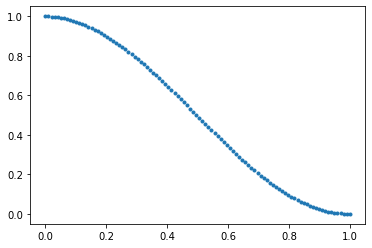

In [ ]:
x=torch.linspace(0,1,100)
plt.plot(x,gamma_t(x),'.')

In [ ]:
37e12*7e9/1e18

259000.0

In [ ]:
259.000